In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal=sns.color_palette()
plt.style.use('fivethirtyeight')
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error


In [15]:
df=pd.read_csv(r"C:\ML_Analytics\Time_Series_Forecasting\Data\raw\Hourly_Energy_consumption\PJME_hourly.csv")
df=df.set_index('Datetime')
df.index=pd.to_datetime(df.index)

In [16]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


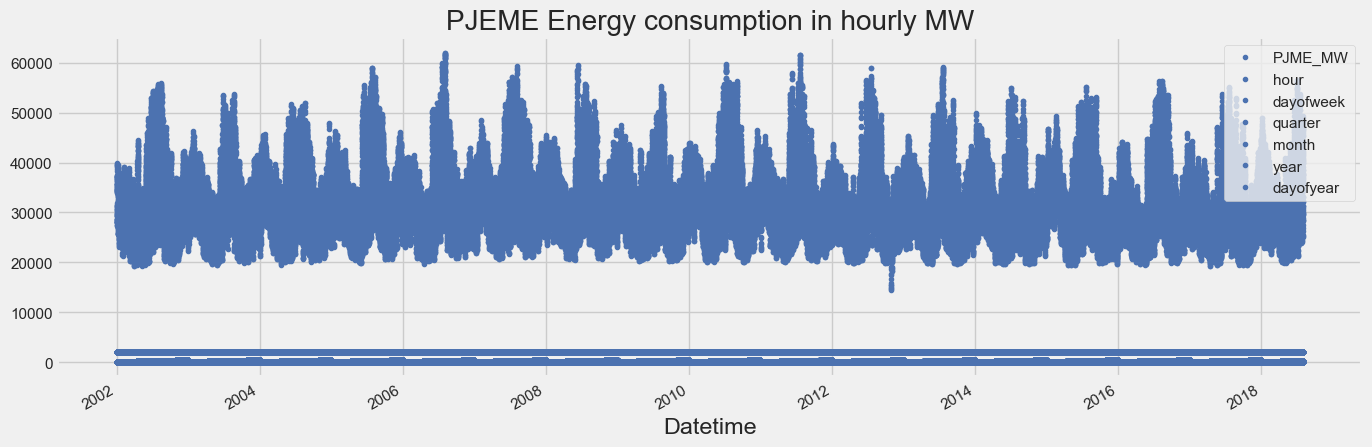

In [59]:
df.plot(style='.',figsize=(15,5),color=color_pal[0],title='PJEME Energy consumption in hourly MW')
plt.show()

# Train/Test Split

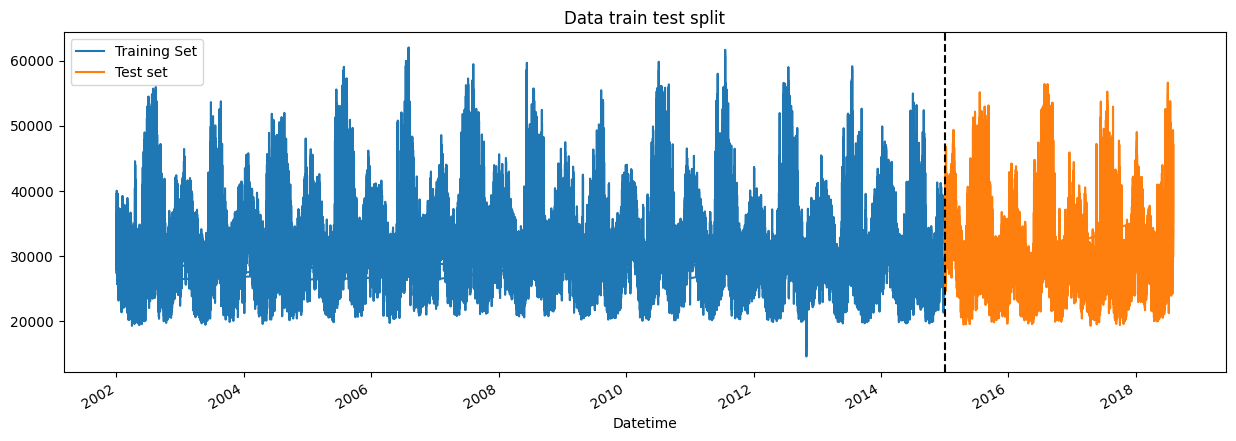

In [27]:
train =df.loc[df.index < '01-01-2015']
test =df.loc[df.index >= '01-01-2015']

fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set',title='Data train test split')
test.plot(ax=ax, label='Test set')
ax.axvline('01-01-2015',color='black',ls='--')
ax.legend(['Training Set','Test set'])
plt.show()

In [36]:
df.sort_index(inplace=True)

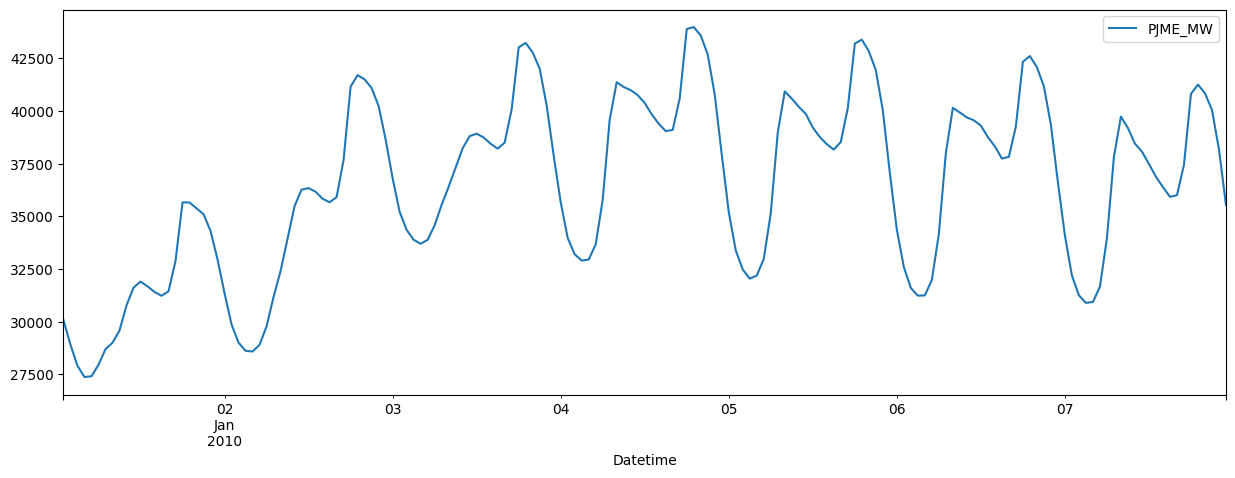

In [38]:
df.loc[(df.index > '01-01-2010') & (df.index <'01-08-2010')].plot(figsize=(15,5))
plt.show()

# Feature Creation

In [40]:
def create_features(df):
    """
    create timeseries features based on time series.index
    """
    df['hour']=df.index.hour
    df['dayofweek']=df.index.day_of_week
    df['quarter']=df.index.quarter
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    return df


In [41]:
df=create_features(df)

In [42]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1


# Visualize our Feature/ Target Relationship

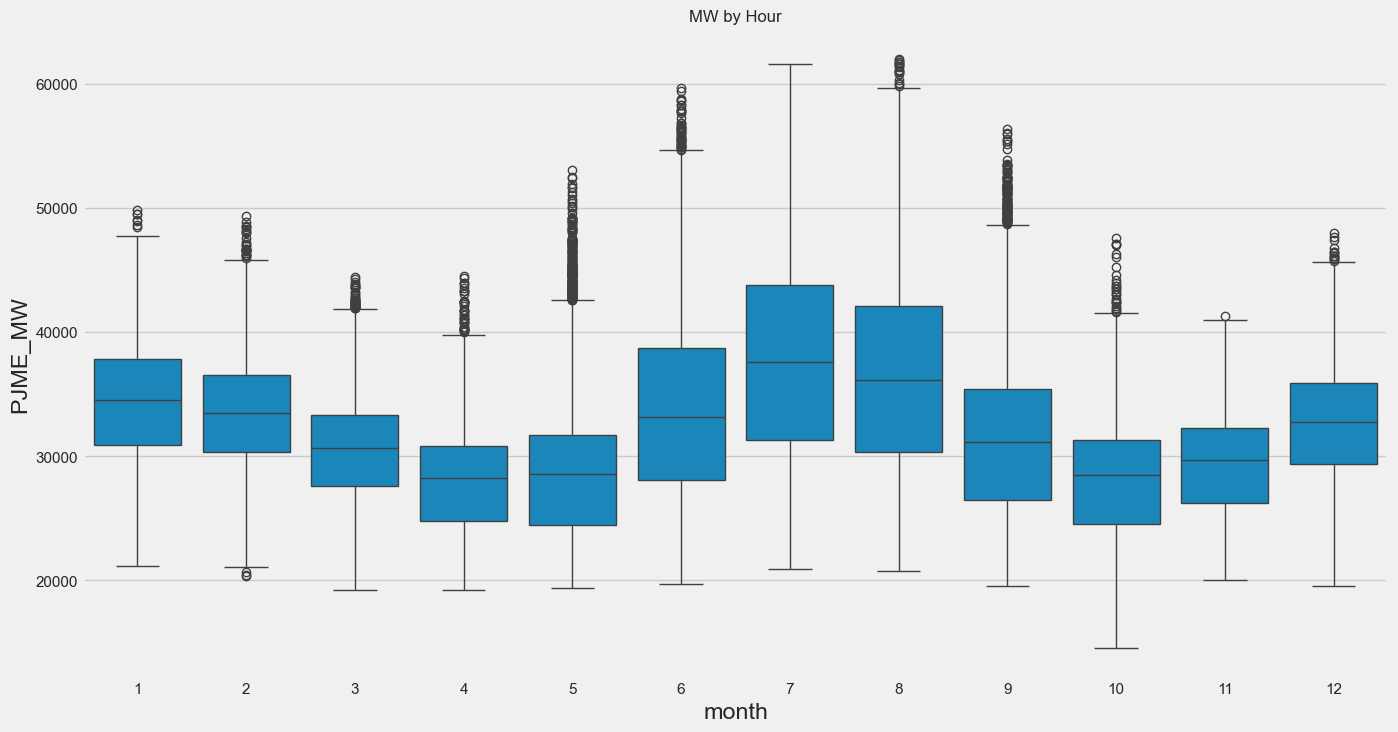

In [60]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df,x='month',y='PJME_MW')
sns.set() 
ax.set_title('MW by Hour')
plt.show()


# Create Our Model